<a href="https://colab.research.google.com/github/sourcecode369/deep-natural-language-processing/blob/master/universal%20sentence%20encoder/Universal_Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub
from sklearn import preprocessing
from tensorflow import keras
import numpy as np 
import pandas as pd

TensorFlow 2.x selected.


In [0]:
from absl import logging
import os
import re
import seaborn as sns

In [6]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
emb = hub.load(module_url)

print(f"{module_url} has been loaded.")

https://tfhub.dev/google/universal-sentence-encoder-large/5 has been loaded.


In [0]:
def embed(input):
  return emb(input)

In [0]:
word = 'Aritifical Intelligence'
sentence = 'Artificial Intelligence is the future.'
paragraph = (" A computer program is said to learn from task T with performance measure P and with experience E if its performance on task T with respect perofrmance measure P improves with experience E.")

messages = [word, sentence, paragraph]

In [0]:
logging.set_verbosity(logging.ERROR)

In [0]:
message_embeddings = embed(messages)

In [11]:
for i, message_embedding in enumerate(np.array(message_embeddings)):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      str(x) for x in message_embedding[:3]
  )
  print("Embedding: [{},...]".format(message_embedding_snippet))

Message: Aritifical Intelligence
Embedding size: 512
Embedding: [0.05702079, 0.039626215, 0.016676832,...]
Message: Artificial Intelligence is the future.
Embedding size: 512
Embedding: [0.068350114, -0.009089353, 0.042877108,...]
Message:  A computer program is said to learn from task T with performance measure P and with experience E if its performance on task T with respect perofrmance measure P improves with experience E.
Embedding size: 512
Embedding: [-0.045430247, 0.01515474, 0.041092094,...]


### Semantic Textual Similarity Task Example

In [0]:
def plot_similarity(labels, features, rotation):
  sns.set(rc={"figure.figsize":(12,12)})
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(corr,
                  xticklabels=True,
                  yticklabels=True,
                  vmin=0,
                  vmax=1,
                  cmap='YlOrRd')
  g.set_xticklabels(labels, rotation=rotation)
  g.set_yticklabels(labels, rotation=0)
  g.set_title('Semantic Textual Similarity')

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

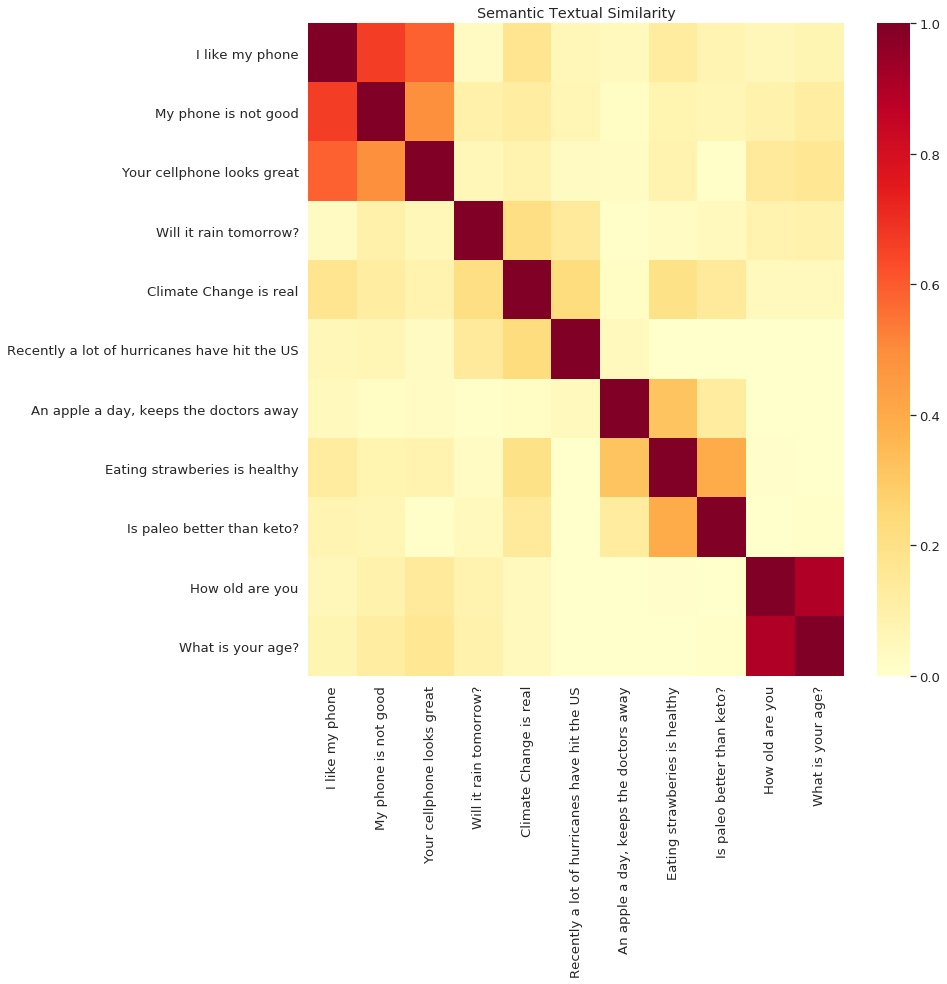

In [13]:
messages = [
            # Smartphones
            "I like my phone",
            "My phone is not good",
            "Your cellphone looks great",

            # Weather
            "Will it rain tomorrow?",
            "Climate Change is real",
            "Recently a lot of hurricanes have hit the US",

            # Food and Health
            "An apple a day, keeps the doctors away",
            "Eating strawberies is healthy",
            "Is paleo better than keto?",

            # Asking about age
            "How old are you",
            "What is your age?",
]

run_and_plot(messages)

### Spam Classification

In [24]:
from google.colab import files 
files.upload()

Saving sms-spam-collection-dataset.zip to sms-spam-collection-dataset.zip


{'sms-spam-collection-dataset.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xcf\x164O\x03\xce\xd7\xf4\xff\xff\xff\xff\xff\xff\xff\xff\x08\x00\x14\x00spam.csv\x01\x00\x10\x00o\xaf\x07\x00\x00\x00\x00\x00\xe4J\x03\x00\x00\x00\x00\x00\xd4\xbd\xcbr\x1bY\x92&\xbc\xff\xcd\xe6\x1d\x0e\xd5c\xa9\xca,\x10\x02@\xf0\xda\xd6\xcd\x06IH\x84D\x12,\x02\x14\xa5\xb62+\x0b\x00\x01 \x92\x81\x08T\\\x08B66\xfby\x8ez\x8d\xff\x11\xca\xacW\xb3\xeau=Co\xc7\xbf\xcf\xcf\x898PfuOO\xf7bF\x95%\x91@\\\xcf\xc5/\x9f\x7f\xee\xfe\xd2n\xbct\x1a\x8d\xc6\x7f\xf9\xff\x96\xc1\xaa\xf1\xe6Cj\xca\xa4\x88b\xf3s\x99\xa5\xc9\xc2\xac\xd3()\x1af\x9a\x05\xdf\xb6\xcd\xa6\xe9\xbd\x04Q\x1cL\xe2\xd0\xa4I\xbc5Qb&\xe5"\xcaMb\x16Y\x18\x14f\x93f\xf1\xcc\xc4\x81\t\xe5\x8b\xf9<,\x9ar\xd2e\x94\x84\xa6X\x86Yh\x16ia\x82U*?m\x02|\xf7\xa6\xba\xf3\xf0YN\xcbp\xf8\xc7\xf49\x92;o\xa2\xb9)\xe56\x91|\xc6\xa3\xf2\xb5\x1c\xf6>\x0bC\x13&E\xc6\x9bwL`6\xcf\xf2 \xd3t\xb56E*\'%\xe6}\xcf\\\x96k3\x8f\x92 6\xc5s\x91\x9bN;/\xccm\xb05\x9dV\xeb\xb0i\xc6\xe1k\x81\xa3\xe4\xf8\

In [0]:
import zipfile
with zipfile.ZipFile("sms-spam-collection-dataset.zip","r") as zf:
  zf.extractall()

In [13]:
!ls -GFlash --color

total 720K
4.0K drwxr-xr-x 1 root 4.0K Mar 12 12:07 ./
4.0K drwxr-xr-x 1 root 4.0K Mar 12 11:34 ../
4.0K drwxr-xr-x 1 root 4.0K Mar  3 18:11 .config/
4.0K drwxr-xr-x 1 root 4.0K Mar  3 18:11 sample_data/
212K -rw-r--r-- 1 root 211K Mar 12 12:05 sms-spam-collection-dataset.zip
492K -rw-r--r-- 1 root 492K Mar 12 12:35 spam.csv


In [0]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [15]:
from IPython.display import display
from tqdm import tqdm_notebook, tqdm
with pd.option_context("display.max_rows",5, "display.max_columns",1000):
  display(data)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
...,...,...,...,...,...
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [0]:
y = list(data['v1'])
x = list(data['v2'])

In [17]:
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [0]:
def encode(le, labels):
  enc = le.transform(labels)
  return tf.keras.utils.to_categorical(enc)

def decode(le, one_hot):
  dec = np.argmax(one_hot, axis=1)
  return le.inverse_transform(dec)

In [19]:
test = encode(le, ['ham','spam','ham', 'spam'])
print(test)

untest = decode(le, test)
print(untest)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
['ham' 'spam' 'ham' 'spam']


In [0]:
x_enc = x
y_enc = encode(le, y)

In [0]:
x_train = np.asarray(x_enc[:5000])
y_train = np.asarray(y_enc[:5000])

x_test = np.asarray(x_enc[5000:])
y_test = np.asarray(y_enc[5000:])

In [0]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [0]:
def UniversalEmbedding(x):
    return emb(tf.squeeze(tf.cast(x, tf.string)))

In [26]:
input_text = Input(shape=(1,), dtype=tf.string)
embedding = Lambda(UniversalEmbedding, output_shape=(512, ))(input_text)
dense = Dense(1024, activation='relu')(embedding)
pred = Dense(2, activation='softmax')(dense)
model = Model([input_text], pred)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 527,362
Trainable params: 527,362
Non-trainable params: 0
_________________________________________________________________


In [28]:
%load_ext tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=256, 
    validation_data=(x_test, y_test),
     callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1, restore_best_weights=True, mode='min'),
                tf.keras.callbacks.ModelCheckpoint('model.h5',monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1),
                tensorboard_callback
               ]
)

Train on 5000 samples, validate on 572 samples
Epoch 1/10
4864/5000 [============================>.] - ETA: 0s - loss: 0.3336 - accuracy: 0.8933
Epoch 00001: val_loss improved from inf to 0.10457, saving model to model.h5
5000/5000 [==============================] - 18s 4ms/sample - loss: 0.3279 - accuracy: 0.8954 - val_loss: 0.1046 - val_accuracy: 0.9685
Epoch 2/10
4864/5000 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9749
Epoch 00002: val_loss improved from 0.10457 to 0.04720, saving model to model.h5
5000/5000 [==============================] - 4s 809us/sample - loss: 0.0883 - accuracy: 0.9746 - val_loss: 0.0472 - val_accuracy: 0.9895
Epoch 3/10
4864/5000 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9833
Epoch 00003: val_loss improved from 0.04720 to 0.03680, saving model to model.h5
5000/5000 [==============================] - 4s 822us/sample - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch 4/10

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import seaborn as sns
def plot_train_history(history):
  sns.set_style('whitegrid')
  sns.set(rc={"figure.figsize":(12,8)})
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  epochs = range(len(loss))

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title("Loss")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, 'b', label='Training loss')
  plt.plot(epochs, val_acc, 'r', label='Validation loss')
  plt.title("Accuracy")
  plt.legend()

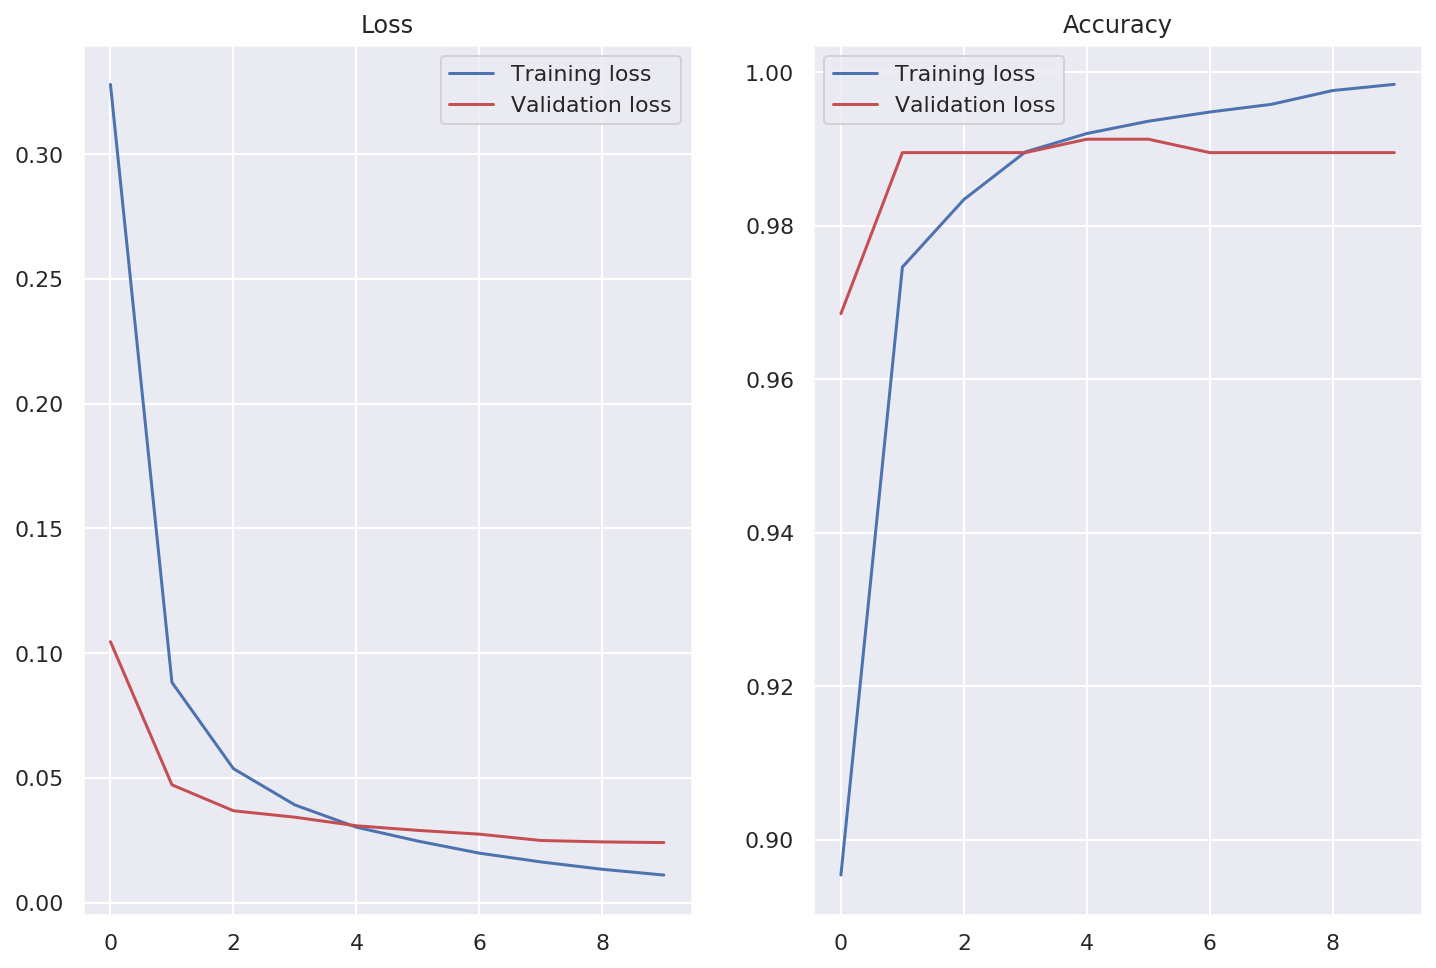

In [32]:
plot_train_history(history)

In [0]:
predicts = model.predict(x_test, batch_size=256)

In [0]:
y_test = decode(le, y_test)
y_preds = decode(le, predicts)

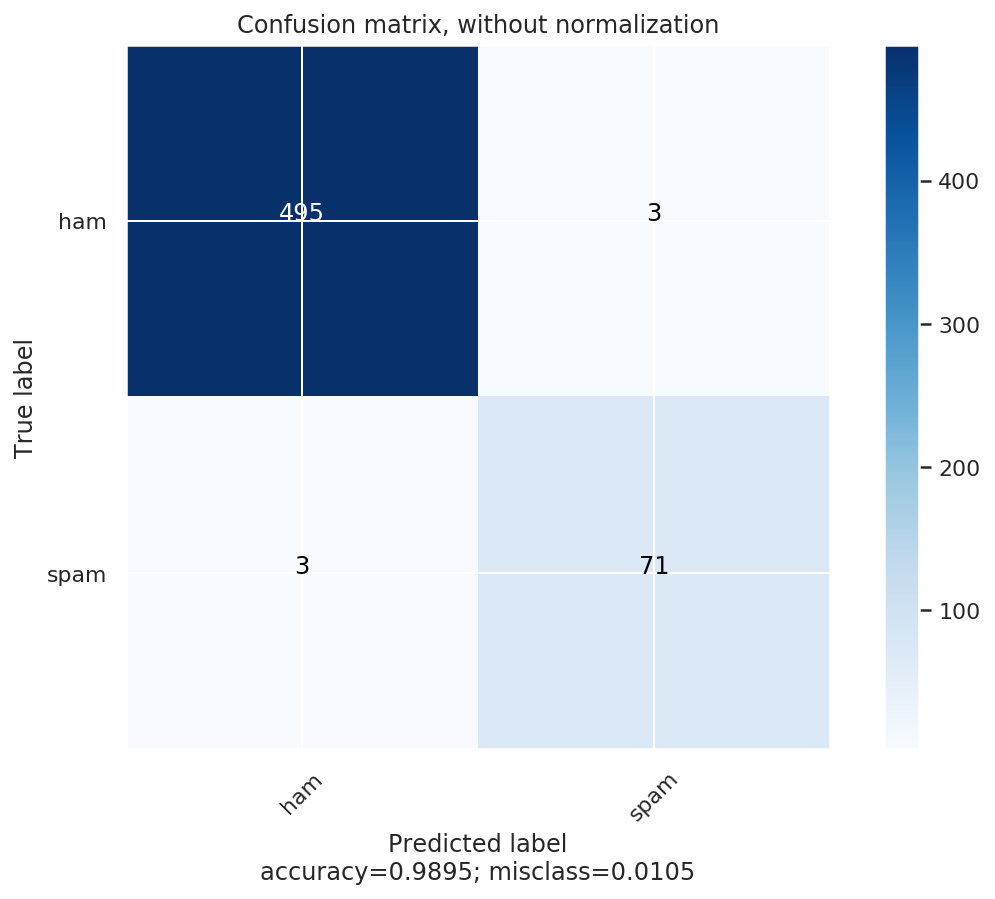

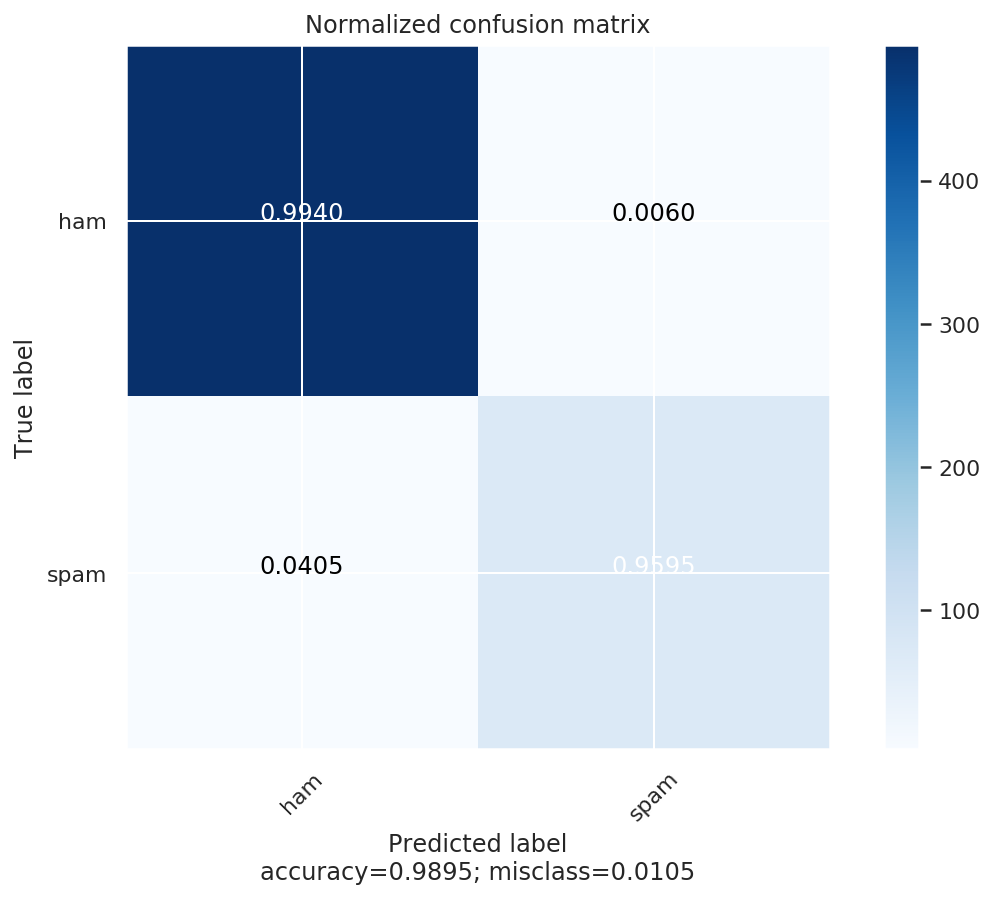

In [39]:
np.set_printoptions(precision=2)
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]



def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

for title, normalize in titles_options:
  plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, y_preds),
                        normalize=normalize,
                        target_names=["ham","spam"],
                        title=title)